# Data Cookbook

### Recipe 1 - Plotting Datetime

To start this analysis, at least two packages are needed. In this case, it will be Numpy and Pandas, which are both very useful for data analysis of almost any type. Additionally, matplotlib will be imported for the plotting aspect of the analysis.

In [7]:
# Importing the packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Reading a CSV file can be done with the read_csv function from Pandas. CSV stands for "comma separated values" and is programmed to read files with comma-separation. There is another function for reading an Excel file, but for now we are going to stick with the CSV function. The data is uploaded to a DataFrame which is a 2D arrary of rows and columns.

We are going to be looking at my personal data from Project 8. The function head() shows the first five rows of the dataframe, and tail() is similar but instead shows the last five.

In [8]:
# Importing the CSV file

df = pd.read_csv('colby.csv')
df.head()

,Unnamed: 0,0
0,0,timestamp
1,timestamp,"Aug 4, 2019, 12:00 PM"
2,timestamp,"Aug 2, 2019, 8:53 PM"
3,timestamp,"Jul 22, 2019, 10:29 PM"
4,timestamp,"Jul 22, 2019, 10:28 PM"


We can see that the timestamp column has the dates and times, but it is difficult to do an analysis with the months as strings and AM and PM attached to the times as well. So, we can use Pandas to convert this format to datetime, which is a standardized format of dates and times. There is an easy way to do this usinng the Pandas function to_datetime(). The iloc method specifices which rows should be changed to datetime, which in this case is all of them, so the whole range is covered through 1:,1.

In [16]:
df_colby = pd.to_datetime(df.iloc[1:,1])
df_colby.head()

1   2019-08-04 12:00:00
2   2019-08-02 20:53:00
3   2019-07-22 22:29:00
4   2019-07-22 22:28:00
5   2019-07-08 19:18:00
Name: 0, dtype: datetime64[ns]

Now, using matplotlib, we can quickly create a scatterplot of these times. The object we are calling is plt as this is what we have specified the plot to be called. The first function we will use is title(), which accepts a string value to put as the title. Then, gca() will be used to get the object in the axes. Using get_yaxis() will specify we want the y-axis, and set_visible(False) shows that we do not want to see the values of the y-axis. This is because in this case, there are no values for the y-axis as we only want to see the progession of time, but want to see the distribution of the Instagram likes over time. The next row will make a scatterplot using the data from df_colby. The x-axis is the datetime and the y-axis is randomly plotting points on the y-axis so there is a visual difference between the times and it is not all bunched together. The alpha is a range from 0 to 1 to change the opacity of the points. This helps for overlapping points to be able to see everything. Then, legend() and show() are used to show the plot and the corresponding labels.

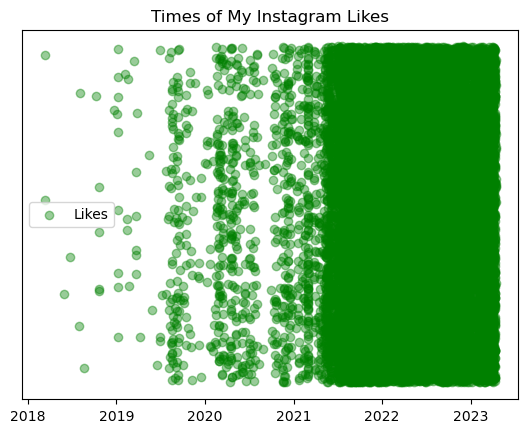

In [24]:
plt.title('Times of My Instagram Likes')
plt.gca().get_yaxis().set_visible(False)
plt.scatter(df_colby, np.random.random(len(df_colby)), color = 'green', label = 'Likes', alpha = 0.4)
plt.legend()
plt.show()

We can also plot this as a histogram very easily to see a clearer trend. Instead of calling a scatterplot, we just call for a histogram. The bins are the number of individual spires. The more bins, the more precise the peaks.

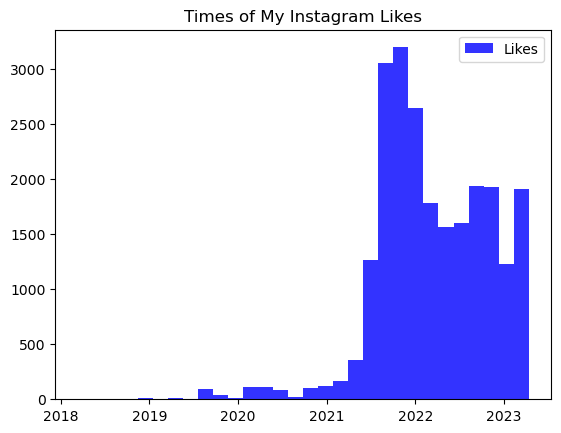

In [23]:
plt.title('Times of My Instagram Likes')
plt.hist(df_colby, bins = 30, color = 'blue', label = 'Likes', alpha = 0.8)
plt.legend()
plt.show()

### Recipe 2 - Sorting Tables and Finding Maxima

For this recipe, the data from a quick gyroscope reading will be used. First, the packages will be imported. Then, the function read_csv() will be used to import the CSV file. Again, we use head() to see the first few rows of the data.

In [63]:
# Importing packages

import pandas as pd
import numpy as np

In [64]:
df = pd.read_csv('Gyroscope Data.csv')
df.head()

,Time (s),Gyroscope x (rad/s),Gyroscope y (rad/s),Gyroscope z (rad/s),Absolute (rad/s)
0,0.023118,-1.355245,-0.628771,-0.399529,1.546501
1,0.033121,-1.342769,-0.536207,-0.397011,1.499388
2,0.043124,-1.149626,-0.425576,-0.405166,1.291090
3,0.053127,-0.843438,-0.300333,-0.366999,0.967614
4,0.063130,-0.528207,-0.292584,-0.300242,0.674354


We can see that there are very long names for the x, y, and z directions, so lets change that. We can rename this quickly by using the rename() function. We specify the columns we want to change and what they should be renamed to by putting them as a key and value pair.

In [43]:
df = df.rename(columns = {'Gyroscope x (rad/s)': 'x', 'Gyroscope y (rad/s)': 'y', 'Gyroscope z (rad/s)': 'z', 'Absolute (rad/s)': 'Net'})
df.head()

,Time (s),x,y,z,Net
0,0.023118,-1.355245,-0.628771,-0.399529,1.546501
1,0.033121,-1.342769,-0.536207,-0.397011,1.499388
2,0.043124,-1.149626,-0.425576,-0.405166,1.291090
3,0.053127,-0.843438,-0.300333,-0.366999,0.967614
4,0.063130,-0.528207,-0.292584,-0.300242,0.674354


This dataframe looks much simpler and is easier to call the columns. Now we will find the maximum value of the net rad/s by sorting the column and looking at the first value. If it sorts correctly, the first value will be the highest. We will use the sort_values() function and specify that we want the column to descent so that we can see the higest values first. A new dataframe will be made that has the sorted values, because sorting the values does not change the actual values of the original dataframe.

In [44]:
df_sorted = df.sort_values('Net', ascending = False)
df_sorted.head()

,Time (s),x,y,z,Net
540,5.424651,7.818666,0.421405,-1.443514,7.961963
539,5.414649,7.765874,0.339574,-1.615600,7.939413
541,5.434654,7.601179,0.292987,-1.107817,7.687068
538,5.404646,7.473188,-0.018964,-1.632192,7.649376
851,8.535528,-6.515300,2.913976,-1.569360,7.307755


Now that it's sorted, we can easily access the highest value from the net angular velocity.

In [45]:
df_sorted['Net'].iloc[0]

7.961962864

We can see that the maximum net angular velocity is 7.96 rad/s. We can also find this very easily by using the max() function, which returns the maximum value of a column. We will do this for the x rad/s column.

In [46]:
df_sorted['Net'].max()

7.961962864

We get the same result as well. For finding singluar maximum values, the second method is much easier. If you are needing to sort the entire column and then want the maximum value, the first option is much better.

### Recipe 3 - Getting Data From API

This recipe will be using the Star Wars API I used in Project 6. Different packages are needed, such as requests for getting data from the API, and json for the format in which the data comes in.

In [58]:
# Importing packages

import requests
import json

Now that everything is uploaded, we can get data from the API. The website in which the data is coming from recommends using people to start the analysis, so copying the link will allow webscraping to take place. The info variable is taking info from the website that is applicable to person 2. The json() function parses through the data to put the data into a Python dictionary. From there, we are printing the different keys of the dictionary in order to see what different information about person 2 is stored.

In [49]:
star_wars_p2 = 'https://swapi.dev/api/people/2'
star_wars_p2_info = requests.get(star_wars_p2).json()
for element in star_wars_p2_info.keys():
    print(element)

name
height
mass
hair_color
skin_color
eye_color
birth_year
gender
homeworld
films
species
vehicles
starships
created
edited
url


If we want to actually find information about person 2, we just have to call the element we want.

In [52]:
print(star_wars_p2_info['name'])

C-3PO


Very easy! We can do this for every element if we would like, and I will show a few more examples.

In [55]:
print(star_wars_p2_info['skin_color'])

gold


In [56]:
print(star_wars_p2_info['eye_color'])

yellow


Lots of information can easily be attained through using json() for parsing the data. It is also very easy to get data from open APIs. APIs are very valuable for analysis such as COVID cases, baseball statistics, or virtually any other category that can be thought of.

### Recipe 4 - Plotting Multiple Lines

As someone who will use data for many more experiements in the future, I find it very important to be able to plot multiple columns to compare and contrast. Let's go back to the gryoscope data, and plot each column to see the similarities and differences. We will start by importing the necessary packages and the CSV file as always.

In [65]:
# Importing packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [66]:
df = pd.read_csv('Gyroscope Data.csv')
df.head()

,Time (s),Gyroscope x (rad/s),Gyroscope y (rad/s),Gyroscope z (rad/s),Absolute (rad/s)
0,0.023118,-1.355245,-0.628771,-0.399529,1.546501
1,0.033121,-1.342769,-0.536207,-0.397011,1.499388
2,0.043124,-1.149626,-0.425576,-0.405166,1.291090
3,0.053127,-0.843438,-0.300333,-0.366999,0.967614
4,0.063130,-0.528207,-0.292584,-0.300242,0.674354


To plot more than one column, we must plot each one on its own line with its own characteristics. This is done by calling the dataframe to access the time column for the x-axis, and then the respective column we want to display on the y-axis. They each need their own color and label. This is very important as this is how we can tell them apart and can use the legend to display them. After that, the labels need to be labeled correctly and the legend should be called before showing the plot.

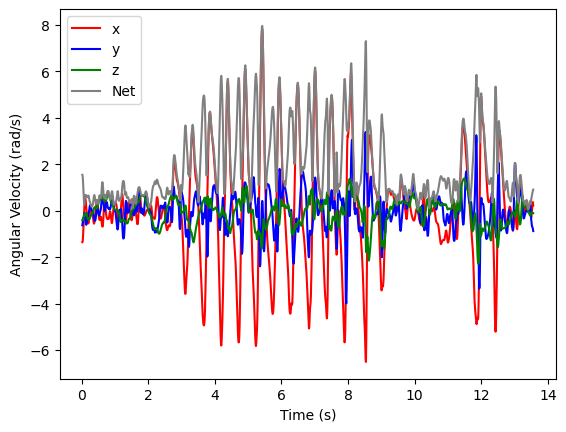

In [82]:
plt.plot(df['Time (s)'], df['Gyroscope x (rad/s)'], color = 'red', label = 'x')
plt.plot(df['Time (s)'], df['Gyroscope y (rad/s)'], color = 'blue', label = 'y')
plt.plot(df['Time (s)'], df['Gyroscope z (rad/s)'], color = 'green', label = 'z')
plt.plot(df['Time (s)'], df['Absolute (rad/s)'], color = 'grey', label = 'Net')
plt.xlabel('Time (s)')
plt.ylabel('Angular Velocity (rad/s)')
plt.legend()
plt.show()

This can also be done on one line, but there is much less organization and customizability. In this next version, there are double brackets on either side of the dataframe. This means that there are multiple columns that the plot will need to parse through to ensure everything is plotted.

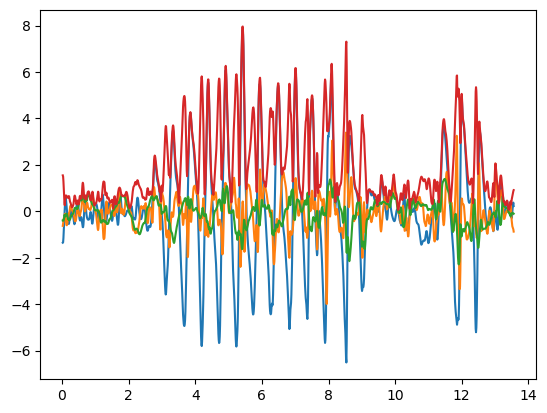

In [87]:
plt.plot(df['Time (s)'], df[['Gyroscope x (rad/s)', 'Gyroscope y (rad/s)', 'Gyroscope z (rad/s)', 'Absolute (rad/s)']])

We can clearly see that the first example is much more organized and allows for more options. Matplotlib has many more features, but the basic ones will help to easily convey important imformation. The visuals are something that I loved to use and something I feel helps to have when presenting data.